# Comparison of all source-receiver combinations; electric and magnetic

We use a simple model of a 1 Ohm.m halfspace below air. Source is 50 m above the surface in the air, receivers are on the surface, frequency is 1 Hz.

In [1]:
import numpy as np               # NumPy
import matplotlib.pyplot as plt  # Matplotlib

from empymod import dipole       # Load required empymod functions

In [2]:
# Plot-style adjustments
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 100

## Define Model

In [3]:
x = np.linspace(-10, 10, 101)*1000
rx = np.repeat([x,],np.size(x),axis=0)
ry = rx.transpose()
inp = {'src': [0, 0, -50],
       'rec': [rx.ravel(), ry.ravel(), 0],
       'depth': 0,
       'res': [2e14, 1],
       'freqtime': 1,
       'xdirect': False,
       'htarg': {'pts_per_dec': -1},  # To speed-up the calculation
       'verb': 0}

## Calculate

In [4]:
# All possible combinations
pab = [11, 12, 13, 14, 15, 16, 21, 22, 23, 24, 25, 26,
       31, 32, 33, 34, 35, 36, 41, 42, 43, 44, 45, 46,
       51, 52, 53, 54, 55, 56, 61, 62, 63, 64, 65, 66]

# Calculate and store them in fs
fs = dict()
for ab in pab:
    fs[str(ab)] = dipole(ab=ab, **inp).reshape(np.shape(rx))

## Plot

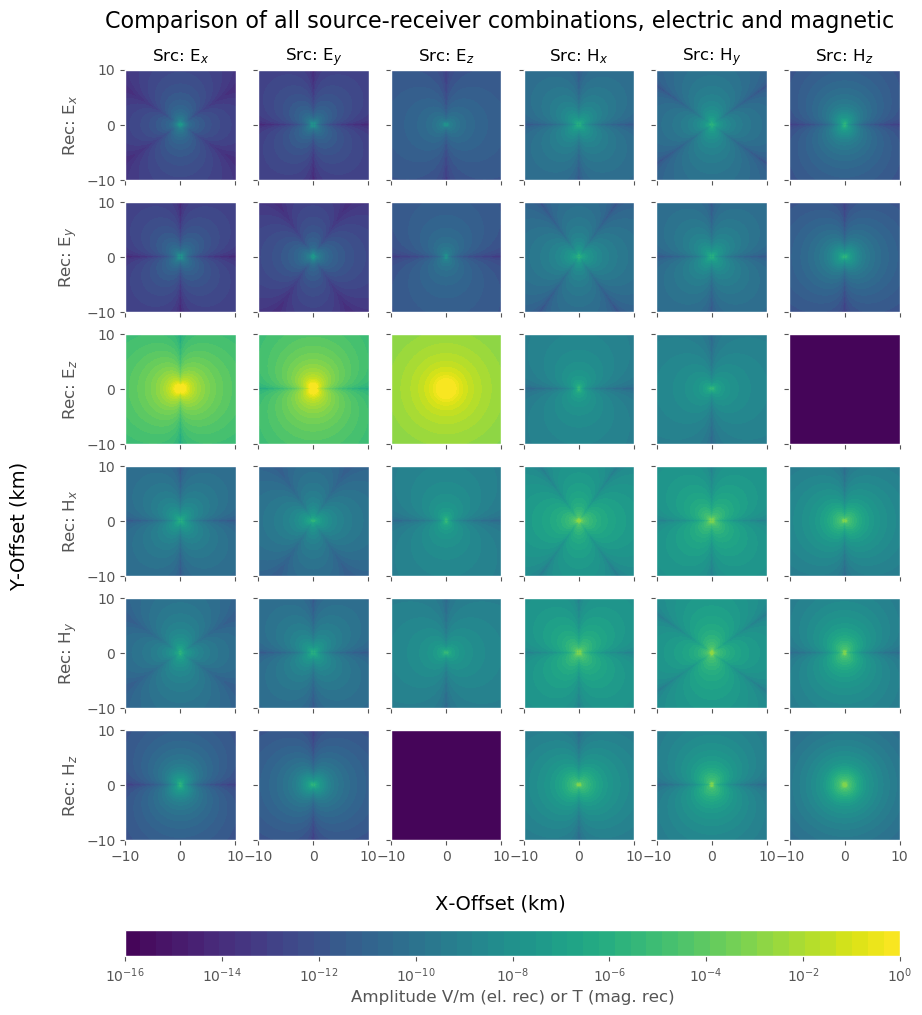

In [5]:
fig, axs = plt.subplots(figsize=(10, 12), nrows=6, ncols=6)
axs = axs.ravel()

# Labels
label1 = ['x', 'y', 'z']
label2 = ['E', 'H']

# Colour settings
vmin = 1e-16
vmax = 1e-0
props = {'levels': np.logspace(np.log10(vmin), np.log10(vmax), 50),
         'locator': plt.matplotlib.ticker.LogLocator()}

# Loop over combinations
for i, val in enumerate(pab):
    plt.sca(axs[i])

    # Axis settings
    plt.xlim(min(x)/1000, max(x)/1000)
    plt.ylim(min(x)/1000, max(x)/1000)
    plt.axis('equal')
    
    # Plot the contour
    cf = plt.contourf(rx/1000, ry/1000, np.abs(fs[str(val)]).clip(vmin, vmax), **props)
    
    # Add titels
    if i < 6:
        label = r'Src: '
        label += label2[0] if i < 3 else label2[1]
        label += '$_'+label1[i%3]+'$'
        plt.title(label, fontsize=12)
        
    # Remove unnecessary x-tick labels
    if i < 30:
        plt.xticks([-10, 0, 10], ())
        
    # Remove unnecessary y-tick labels; add y-labels
    if i%6 != 0:
        plt.yticks([-10, 0, 10], ())
    else:
        label = r'Rec: '
        label += label2[0] if i < 18 else label2[1]
        label += '$_'+label1[(i//6)%3]+'$'
        plt.ylabel(label, fontsize=12)

# Colour bar
cax, kw = plt.matplotlib.colorbar.make_axes(axs, location='bottom', fraction=.05, pad=0.1, aspect=30)
cb = plt.colorbar(cf, cax=cax, ticks=np.logspace(np.log10(vmin), np.log10(vmax), 9), **kw)
cb.set_label(r'Amplitude V/m (el. rec) or T (mag. rec)')

# Annotate
plt.suptitle('Comparison of all source-receiver combinations, electric and magnetic', y=0.93, fontsize=16)
fig.text(0.5, 0.18, 'X-Offset (km)', ha='center', fontsize=14)
fig.text(0.01, 0.5, 'Y-Offset (km)', va='center', rotation='vertical', fontsize=14)

plt.show()

In [6]:
from empyscripts import versions
versions('HTML')